# Project Title:- Multiclass Fish Image Classification

### Project Overview
This project aims to classify images of different fish species into 11 distinct categories using deep learning.
We are training and comparing six models:

1. Custom CNN (built from scratch)
2. MobileNetV2 (Transfer Learning)
3. ResNet50 (Transfer Learning)
4. EfficientNetB0 (Transfer Learning)
5. InceptionV3 (Transfer Learning)

#### The best-performing model will be selected as the champion model and deployed to a Streamlit web application.

#### Dataset Description

**Source**: Custom dataset of fish species

**Classes**:

- animal fish
- animal fish bass
- fish sea_food black_sea_sprat
- fish sea_food gilt_head_bream
- fish sea_food hourse_mackerel
- fish sea_food red_mullet
- fish sea_food red_sea_bream
- fish sea_food sea_bass
- fish sea_food shrimp
- fish sea_food striped_red_mullet
- fish sea_food trout

**Images**:
- **Training set**: 4,984 images
- **Validation set**: 215 images
- **Test Set**: 200 images

**Classification type**: Multi-class image classification

In [1]:
# Quick sanity check to verify installation

# import libraries
import pandas as pd
import numpy as np

import tensorflow as tf
import cv2
import sklearn
import joblib
import streamlit as st

print("Setup Complete!!!")

Setup Complete!!!


In [2]:
#!pip install opencv-python

In [2]:
# Import the necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# image configuration
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
DATA_DIR = "data/"

In [4]:
# Data Augmentation

datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [5]:
# Load train data and validation data
train_generator = datagen.flow_from_directory(
    "data/train",
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True
)

val_generator = datagen.flow_from_directory(
    "data/val",
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset = 'validation',
    shuffle = True
)

Found 4984 images belonging to 11 classes.
Found 215 images belonging to 11 classes.


In [6]:
# class names
class_names = list(train_generator.class_indices.keys())
print("Fish Classes: ", class_names)

Fish Classes:  ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


In [12]:
# visualize sample image for sanity check
def visualize_samples(generator, class_names):
    images, labels = next(generator)
    plt.figure(figsize=(12,8))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        label_idx = np.argmax(labels[i])
        plt.title(class_names[label_idx])
        plt.axis('off')
    plt.tight_layout()
    plt.show()        

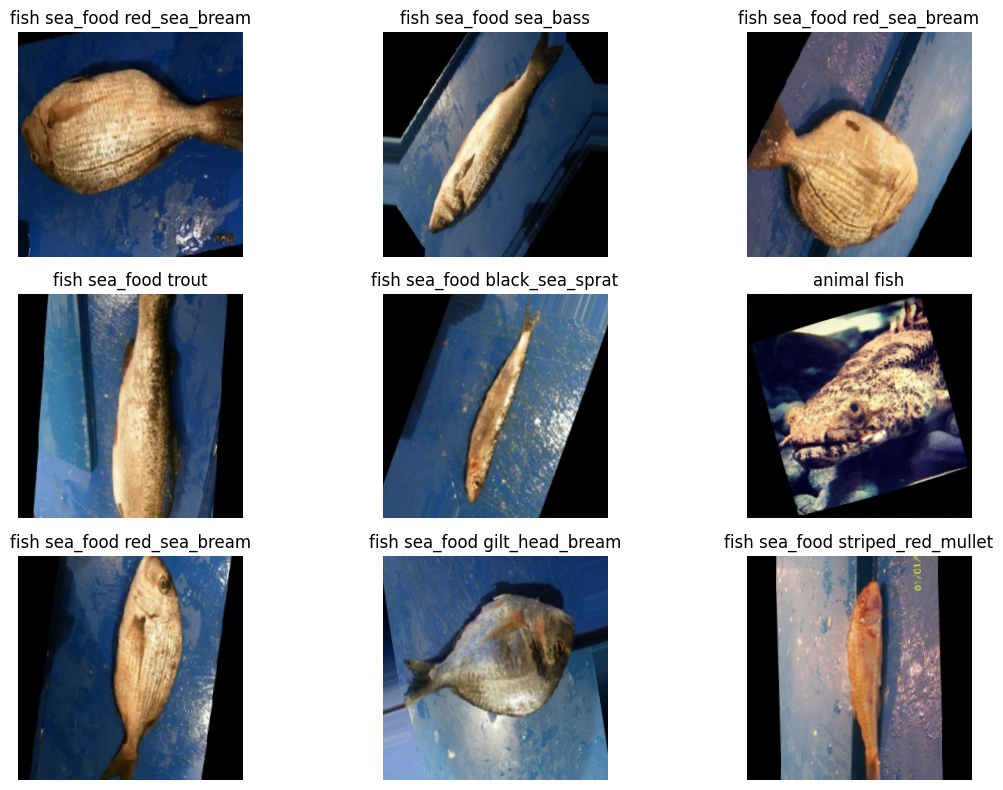

In [13]:
# Run visualization function
visualize_samples(train_generator, class_names)

### Building CNN from Scratch

In [7]:
import tensorflow as tf
from tensorflow.keras import layers,models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

#### Create Custom CNN Architecture

In [15]:
def create_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32,(3,3), activation= 'relu', input_shape = input_shape),
        layers.MaxPool2D(2,2),

        layers.Conv2D(64,(3,3), activation= 'relu'),
        layers.MaxPool2D(2,2),

        layers.Conv2D(128,(3,3), activation= 'relu'),
        layers.MaxPool2D(2,2),

        layers.Flatten(),
        layers.Dense(128,activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

In [17]:
# call model with input_shape, number_of_classes
cnn_model = create_cnn((224,224,3),len(class_names))

In [18]:
# compile the model
cnn_model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
# Train the model
history_cnn = cnn_model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 10
)

C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.2759 - loss: 2.1138 - val_accuracy: 0.5023 - val_loss: 1.5575
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.4344 - loss: 1.5475 - val_accuracy: 0.5814 - val_loss: 1.1613
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.5183 - loss: 1.3030 - val_accuracy: 0.6512 - val_loss: 1.0985
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.5915 - loss: 1.1305 - val_accuracy: 0.7302 - val_loss: 0.7369
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.6346 - loss: 1.0030 - val_accuracy: 0.7814 - val_loss: 0.6836
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.6565 - loss: 0.9473 - val_accuracy: 0.7349 - val_loss: 0.7109
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.7043 - loss: 0.8075 - val_accuracy: 0.8465 - val_loss: 0.4755
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 156s 997ms/step - accuracy: 0.7263 - loss: 0.7551 - val_a

In [22]:
# save model
cnn_model.save('cnn_model.h5')

In [23]:
# Evaluation of CNN model over Validation Data.
cnn_val_loss, cnn_val_acc = cnn_model.evaluate(val_generator)
print(f"CNN Validation Accuracy: {cnn_val_acc:.4f}")
print(f"CNN Validation Loss: {cnn_val_loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8605 - loss: 0.4403   
CNN Validation Accuracy: 0.8605
CNN Validation Loss: 0.4403


In [24]:
# Prediction for metrics
cnn_y_true = val_generator.classes
cnn_y_pred = np.argmax(cnn_model.predict(val_generator), axis = 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 705ms/step


In [26]:
cnn_classification_report = classification_report(cnn_y_true, cnn_y_pred, target_names = class_names)
print(cnn_classification_report)

                                  precision    recall  f1-score   support

                     animal fish       0.13      0.14      0.13        37
                animal fish bass       0.00      0.00      0.00         2
   fish sea_food black_sea_sprat       0.08      0.10      0.09        21
   fish sea_food gilt_head_bream       0.07      0.06      0.06        18
   fish sea_food hourse_mackerel       0.08      0.11      0.09        19
        fish sea_food red_mullet       0.18      0.17      0.17        18
     fish sea_food red_sea_bream       0.00      0.00      0.00        22
          fish sea_food sea_bass       0.11      0.05      0.07        19
            fish sea_food shrimp       0.05      0.05      0.05        20
fish sea_food striped_red_mullet       0.12      0.10      0.11        20
             fish sea_food trout       0.04      0.05      0.04        19

                        accuracy                           0.08       215
                       macro avg    

C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

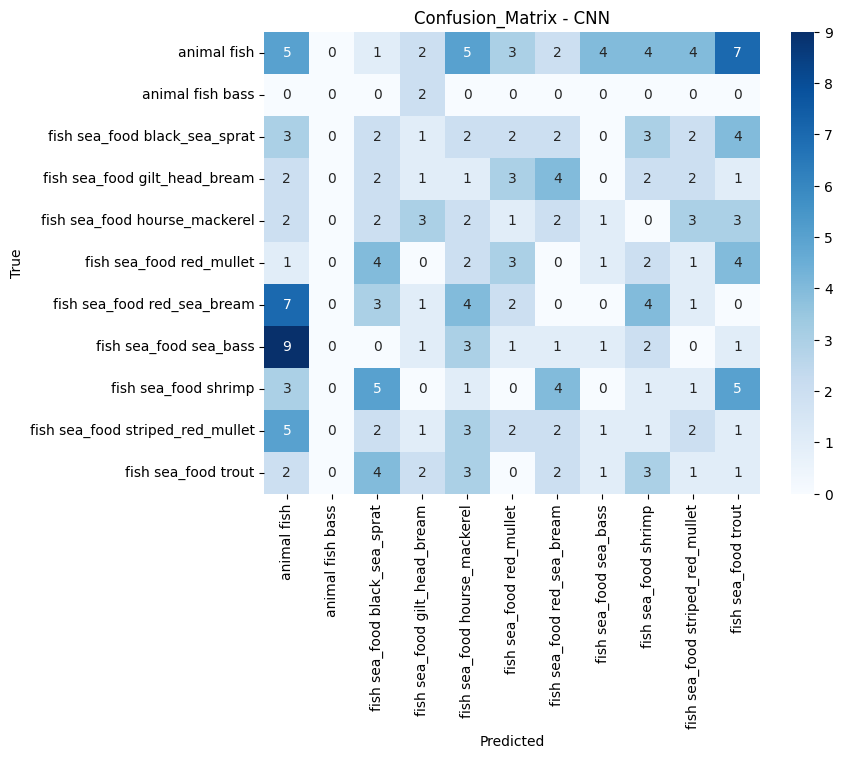

In [28]:
# calculate confusion matrix and display it
cnn_cm = confusion_matrix(cnn_y_true,cnn_y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cnn_cm, annot=True, fmt = 'd', cmap = 'Blues', xticklabels=class_names, yticklabels = class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion_Matrix - CNN')
plt.show()

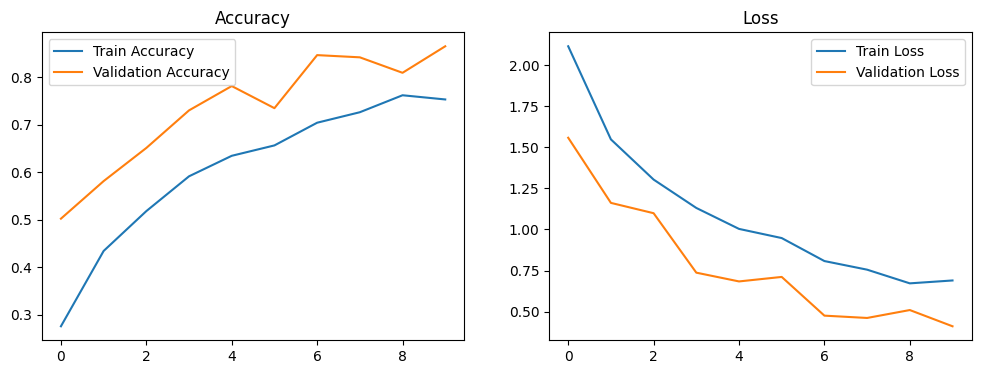

In [29]:
# plot training curve
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'], label = 'Train Loss')
plt.plot(history_cnn.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

## Perform transfer learning with other models.
- ResNet50
- MobileNetV2
- InceptionV3
- EfficientNetB0

In [23]:
# Metrics Storage
results = []

# Create MobileNetV2 Model

In [26]:
# Load pretrained base model
mob_base_model = MobileNetV2(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
mob_base_model.trainable = False   # Freeze layers Initially

In [27]:
# Add Custom Top Layers
inputs = tf.keras.Input(shape=(224,224,3))
x = mob_base_model(inputs, training = False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(class_names), activation = 'softmax')(x)
mobile_net_model = tf.keras.Model(inputs, outputs)

In [28]:
# compile model
mobile_net_model.compile(optimizer = "adam", loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [44]:
# initial training
mobile_net_history = mobile_net_model.fit(train_generator, validation_data = val_generator, epochs = 10)

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 110s 702ms/step - accuracy: 0.8381 - loss: 0.5133 - val_accuracy: 0.9581 - val_loss: 0.1337
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 106s 679ms/step - accuracy: 0.9466 - loss: 0.1725 - val_accuracy: 0.9860 - val_loss: 0.0762
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 108s 691ms/step - accuracy: 0.9665 - loss: 0.1159 - val_accuracy: 0.9907 - val_loss: 0.0363
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 105s 674ms/step - accuracy: 0.9643 - loss: 0.1032 - val_accuracy: 0.9860 - val_loss: 0.0439
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 106s 679ms/step - accuracy: 0.9731 - loss: 0.0798 - val_accuracy: 0.9860 - val_loss: 0.0478
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 106s 680ms/step - accuracy: 0.9761 - loss: 0.0735 - val_accuracy: 0.9814 - val_loss: 0.0420
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 106s 677ms/step - accuracy: 0.9803 - loss: 0.0600 - val_accuracy: 0.9907 - val_loss: 0.0210
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 109s 698ms/step - accuracy: 0.9781 -

In [46]:
# save model
#os.makedirs('models', exist_ok = True)
mobile_net_model.save("mobinet_model.h5")

In [29]:
# store the evalution results
# results = []

# Evaluation
mob_y_true = val_generator.classes
y_pred_probs = mobile_net_model.predict(val_generator)
mob_y_pred = np.argmax(y_pred_probs, axis = 1)

acc = accuracy_score(mob_y_true, mob_y_pred)
prec = precision_score(mob_y_true, mob_y_pred, average = 'weighted')
rec = recall_score(mob_y_true, mob_y_pred, average = 'weighted')
f1 = f1_score(mob_y_true, mob_y_pred, average = 'weighted')

results.append({
        "Model":mobile_net_model,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step   


C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
# save results to csv
#df_results = pd.DataFrame(results)
#df_results.to_csv('model_comparison.csv', index = False)
#print("\n ==== Model Comparison ====")
#print(df_results)

In [51]:
# Classification Report
print(classification_report(mob_y_true, mob_y_pred, target_names=class_names))

                                  precision    recall  f1-score   support

                     animal fish       0.11      0.03      0.04        37
                animal fish bass       0.00      0.00      0.00         2
   fish sea_food black_sea_sprat       0.07      0.05      0.06        21
   fish sea_food gilt_head_bream       0.00      0.00      0.00        18
   fish sea_food hourse_mackerel       0.00      0.00      0.00        19
        fish sea_food red_mullet       0.20      0.06      0.09        18
     fish sea_food red_sea_bream       0.00      0.00      0.00        22
          fish sea_food sea_bass       0.07      0.11      0.08        19
            fish sea_food shrimp       0.09      0.70      0.16        20
fish sea_food striped_red_mullet       0.00      0.00      0.00        20
             fish sea_food trout       0.00      0.00      0.00        19

                        accuracy                           0.09       215
                       macro avg    

C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

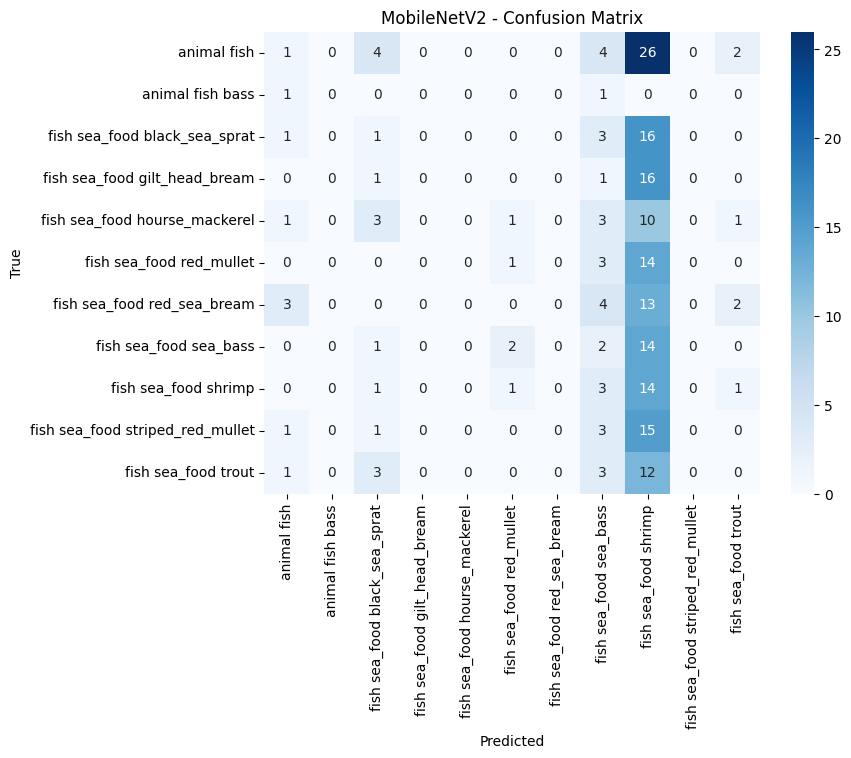

In [52]:
# Confusion Matrix
cm = confusion_matrix(mob_y_true, mob_y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("MobileNetV2 - Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

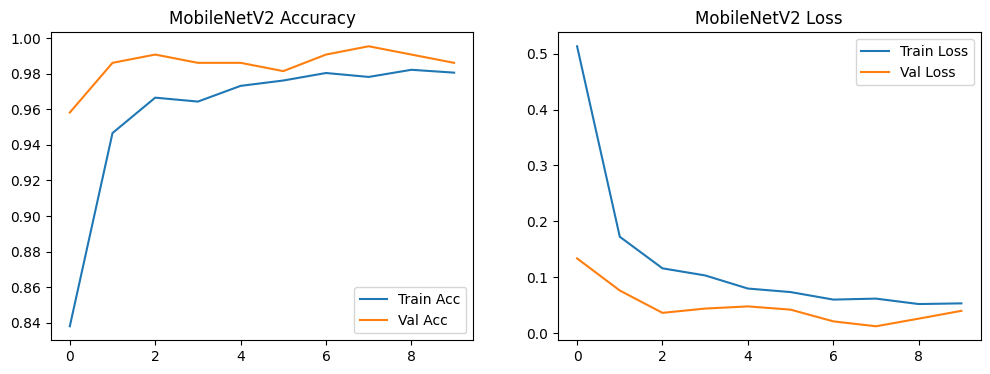

In [54]:
# Training Curve
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(mobile_net_history.history['accuracy'], label='Train Acc')
plt.plot(mobile_net_history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("MobileNetV2 Accuracy")
plt.subplot(1,2,2)
plt.plot(mobile_net_history.history['loss'], label='Train Loss')
plt.plot(mobile_net_history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("MobileNetV2 Loss")
plt.show()    

# Create InceptionV3 Model

In [9]:
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [32]:
# Adjust image size for InceptionV3
IMG_SIZE = (299, 299)
BATCH_SIZE = 32

# Data generators (change target_size to match model input)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "data/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    "data/val",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


In [33]:
#Load pretrained base model
base_model_incept = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (299,299,3))

#Freeze base model layers
for layer in base_model_incept.layers:
    layer.trainable = False

# Add custom top layers
x = base_model_incept.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

inceptionV3_model = tf.keras.Model(inputs=base_model_incept.input, outputs=predictions)

In [34]:
# compile model
inceptionV3_model.compile(optimizer = "adam", loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [64]:
# initial training
inceptionV3_history = inceptionV3_model.fit(train_generator, validation_data = val_generator, epochs = 10)

C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 399s 2s/step - accuracy: 0.7597 - loss: 0.7446 - val_accuracy: 0.9304 - val_loss: 0.2663
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 369s 2s/step - accuracy: 0.9102 - loss: 0.2940 - val_accuracy: 0.9707 - val_loss: 0.1274
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 369s 2s/step - accuracy: 0.9292 - loss: 0.2211 - val_accuracy: 0.9799 - val_loss: 0.0959
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 392s 2s/step - accuracy: 0.9407 - loss: 0.1803 - val_accuracy: 0.9707 - val_loss: 0.0860
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 502s 3s/step - accuracy: 0.9491 - loss: 0.1569 - val_accuracy: 0.9817 - val_loss: 0.0747
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 531s 3s/step - accuracy: 0.9480 - loss: 0.1566 - val_accuracy: 0.9853 - val_loss: 0.0664
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 510s 3s/step - accuracy: 0.9563 - loss: 0.1355 - val_accuracy: 0.9881 - val_loss: 0.0476
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 517s 3s/step - accuracy: 0.9553 - loss: 0.1364 - val_accu

In [65]:
# save model
#os.makedirs('models', exist_ok = True)
inceptionV3_model.save("inceptionV3_model.h5")

In [35]:
# store the evalution results
# results = []

# Evaluation
incept_y_true = val_generator.classes
y_pred_probs =inceptionV3_model.predict(val_generator)
incept_y_pred = np.argmax(y_pred_probs, axis = 1)

acc = accuracy_score(incept_y_true, incept_y_pred)
prec = precision_score(incept_y_true, incept_y_pred, average = 'weighted')
rec = recall_score(incept_y_true, incept_y_pred, average = 'weighted')
f1 = f1_score(incept_y_true, incept_y_pred, average = 'weighted')

results.append({
        "Model":inceptionV3_model,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step 


C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [67]:
# Classification Report
print(classification_report(incept_y_true, incept_y_pred, target_names=class_names))

                                  precision    recall  f1-score   support

                     animal fish       0.06      0.01      0.01       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.14      0.08      0.10       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.00      0.00      0.00        97
        fish sea_food red_mullet       0.06      0.01      0.02        90
     fish sea_food red_sea_bream       0.00      0.00      0.00       113
          fish sea_food sea_bass       0.08      0.12      0.10        97
            fish sea_food shrimp       0.09      0.75      0.16       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.10      0.01      0.02        98

                        accuracy                           0.09      1092
                       macro avg    

C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

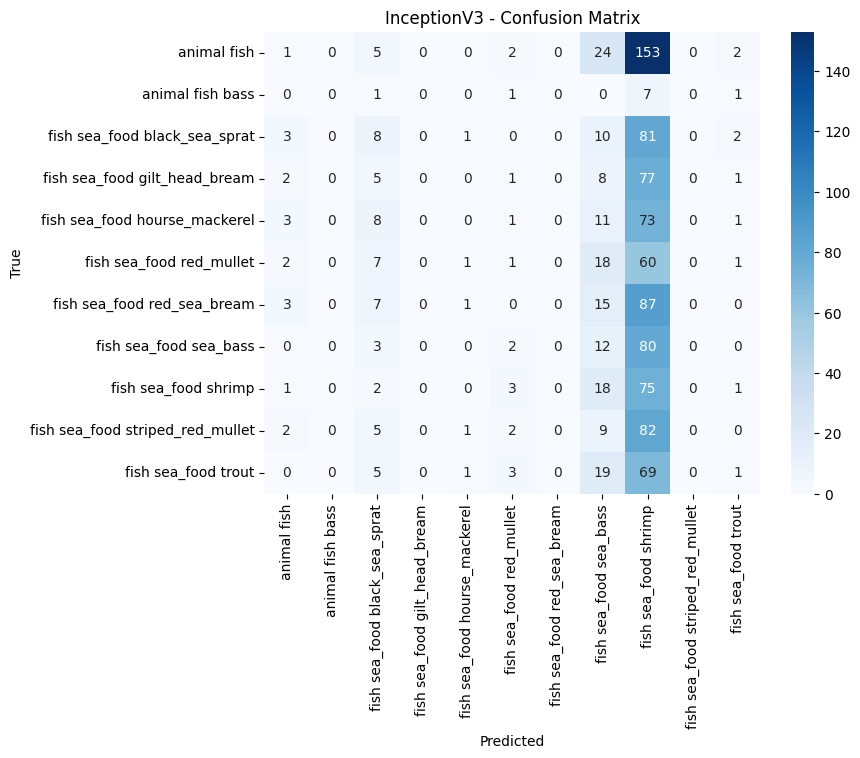

In [69]:
# Confusion Matrix
incept_cm = confusion_matrix(incept_y_true, incept_y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(incept_cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("InceptionV3 - Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Training Curve
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(inceptionV3_model.history['accuracy'], label='Train Acc')
plt.plot(inceptionV3_model.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("InceptionV3 Accuracy")
plt.subplot(1,2,2)
plt.plot(inceptionV3_model.history['loss'], label='Train Loss')
plt.plot(inceptionV3_model.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("InceptionV3 Loss")
plt.show()    

# Create EfficientNetB0 Model

In [18]:
#Load pretrained base model
base_model_eff = EfficientNetB0(weights = None, include_top = False, input_shape = (224,224,3))
base_model_eff.trainable = False   # Freeze layers Initially

# Build the classification Model
eff_model = models.Sequential([
    base_model_eff,
    layers.GlobalAvgPool2D(),
    layers.Dropout(0.3),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(11,activation='softmax')
])

In [19]:
# compile model
eff_model.compile(optimizer = "adam", loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [20]:
# initial training
eff_history = eff_model.fit(train_generator, validation_data = val_generator, epochs = 10)

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.1752 - loss: 2.3474 - val_accuracy: 0.1721 - val_loss: 2.3194
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.1760 - loss: 2.3055 - val_accuracy: 0.1721 - val_loss: 2.3097
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.1760 - loss: 2.3003 - val_accuracy: 0.1721 - val_loss: 2.3096
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 155s 994ms/step - accuracy: 0.1760 - loss: 2.2971 - val_accuracy: 0.1721 - val_loss: 2.3099
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.1760 - loss: 2.2977 - val_accuracy: 0.1721 - val_loss: 2.3102
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.1760 - loss: 2.2963 - val_accuracy: 0.1721 - val_loss: 2.3101
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 156s 996ms/step - accuracy: 0.1760 - loss: 2.2979 - val_accuracy: 0.1721 - val_loss: 2.3118
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.1760 - loss: 2.2983 - va

In [21]:
# save model
eff_model.save("eff_model.h5")

In [36]:
# store the evaluation results
#results = []

# Evaluation
eff_y_true = val_generator.classes
y_pred_probs = eff_model.predict(val_generator)
eff_y_pred = np.argmax(y_pred_probs, axis = 1)

acc = accuracy_score(eff_y_true, eff_y_pred)
prec = precision_score(eff_y_true, eff_y_pred, average = 'weighted')
rec = recall_score(eff_y_true, eff_y_pred, average = 'weighted')
f1 = f1_score(eff_y_true, eff_y_pred, average = 'weighted')

results.append({
        "Model":eff_model,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

35/35 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step 


C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [37]:
# Classification Report
print(classification_report(eff_y_true, eff_y_pred, target_names=class_names))

                                  precision    recall  f1-score   support

                     animal fish       0.17      1.00      0.29       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.00      0.00      0.00        97
        fish sea_food red_mullet       0.00      0.00      0.00        90
     fish sea_food red_sea_bream       0.00      0.00      0.00       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.00      0.00      0.00       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.00      0.00      0.00        98

                        accuracy                           0.17      1092
                       macro avg    

C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

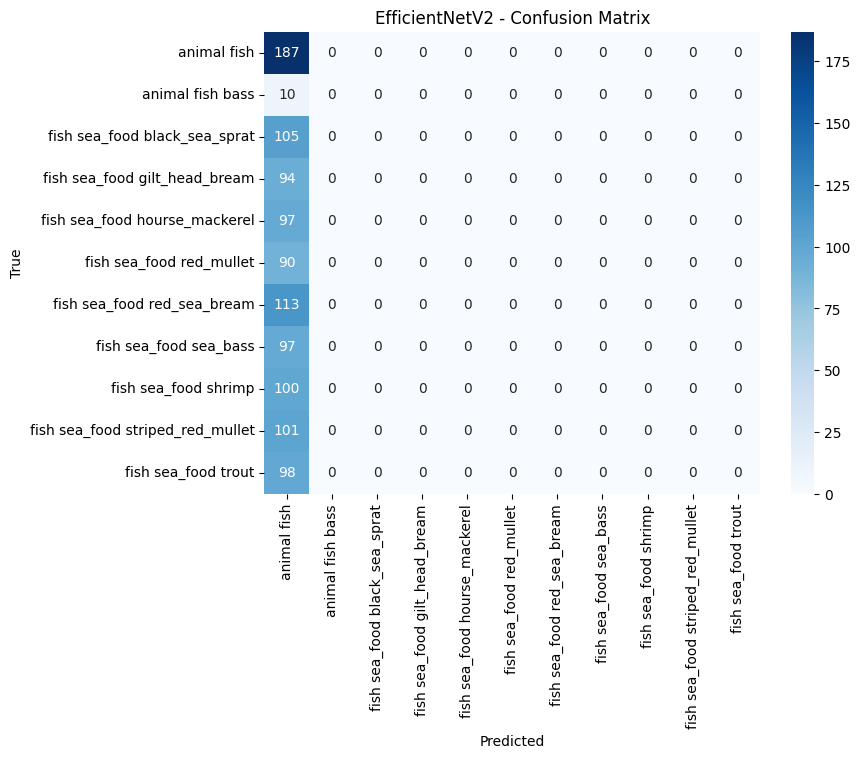

In [38]:
# Confusion Matrix
eff_cm = confusion_matrix(eff_y_true, eff_y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(eff_cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("EfficientNetV2 - Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

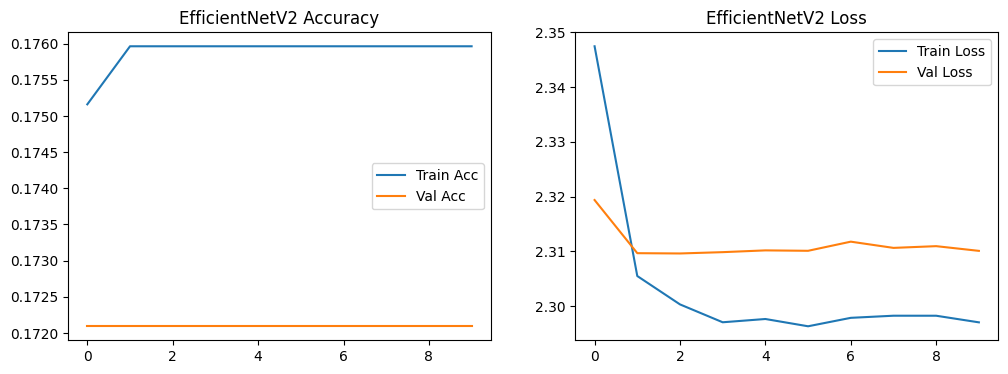

In [39]:
# Training Curve
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(eff_history.history['accuracy'], label='Train Acc')
plt.plot(eff_history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("EfficientNetV2 Accuracy")
plt.subplot(1,2,2)
plt.plot(eff_history.history['loss'], label='Train Loss')
plt.plot(eff_history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("EfficientNetV2 Loss")
plt.show()    

# Create RestNet50 model

In [45]:
#Load pretrained base model
base_model_restnet = ResNet50(weights = 'imagenet', include_top = False, input_shape = (299,299,3))
base_model_restnet.trainable = False   # Freeze layers Initially

In [46]:
# Build the classification Model
restnet_model = models.Sequential([
    base_model_restnet,
    layers.GlobalAvgPool2D(),
    layers.Dropout(0.3),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(11,activation='softmax')
])


# compile model
restnet_model.compile(optimizer = "adam", loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [47]:
# initial training
restnet_history = restnet_model.fit(train_generator, validation_data = val_generator, epochs = 10)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 768s 4s/step - accuracy: 0.1536 - loss: 2.3607 - val_accuracy: 0.1712 - val_loss: 2.3175
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 626s 3s/step - accuracy: 0.1746 - loss: 2.2959 - val_accuracy: 0.1712 - val_loss: 2.2669
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 609s 3s/step - accuracy: 0.1836 - loss: 2.2686 - val_accuracy: 0.2143 - val_loss: 2.2256
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 599s 3s/step - accuracy: 0.1862 - loss: 2.2318 - val_accuracy: 0.2115 - val_loss: 2.1870
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 659s 3s/step - accuracy: 0.1880 - loss: 2.2125 - val_accuracy: 0.2363 - val_loss: 2.1783
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 672s 3s/step - accuracy: 0.1945 - loss: 2.1930 - val_accuracy: 0.2381 - val_loss: 2.1386
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 665s 3s/step - accuracy: 0.1969 - loss: 2.1787 - val_accuracy: 0.2125 - val_loss: 2.1379
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 666s 3s/step - accuracy: 0.2066 - loss: 2.1684 - val_accu

In [49]:
# save model
restnet_model.save("restnet_model.h5")

In [50]:
# store the evaluation results
#results = []

# Evaluation
restnet_y_true = val_generator.classes
y_pred_probs = restnet_model.predict(val_generator)
restnet_y_pred = np.argmax(y_pred_probs, axis = 1)

acc = accuracy_score(restnet_y_true, restnet_y_pred)
prec = precision_score(restnet_y_true, restnet_y_pred, average = 'weighted')
rec = recall_score(restnet_y_true, restnet_y_pred, average = 'weighted')
f1 = f1_score(restnet_y_true, restnet_y_pred, average = 'weighted')

results.append({
        "Model":restnet_model,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

35/35 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step 


C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [51]:
# Classification Report
print(classification_report(restnet_y_true, restnet_y_pred, target_names=class_names))

                                  precision    recall  f1-score   support

                     animal fish       0.19      0.30      0.24       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.00      0.00      0.00        97
        fish sea_food red_mullet       0.00      0.00      0.00        90
     fish sea_food red_sea_bream       0.07      0.02      0.03       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.25      0.01      0.02       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.09      0.73      0.17        98

                        accuracy                           0.12      1092
                       macro avg    

C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\uttam\LabMentix\fish_classifier_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

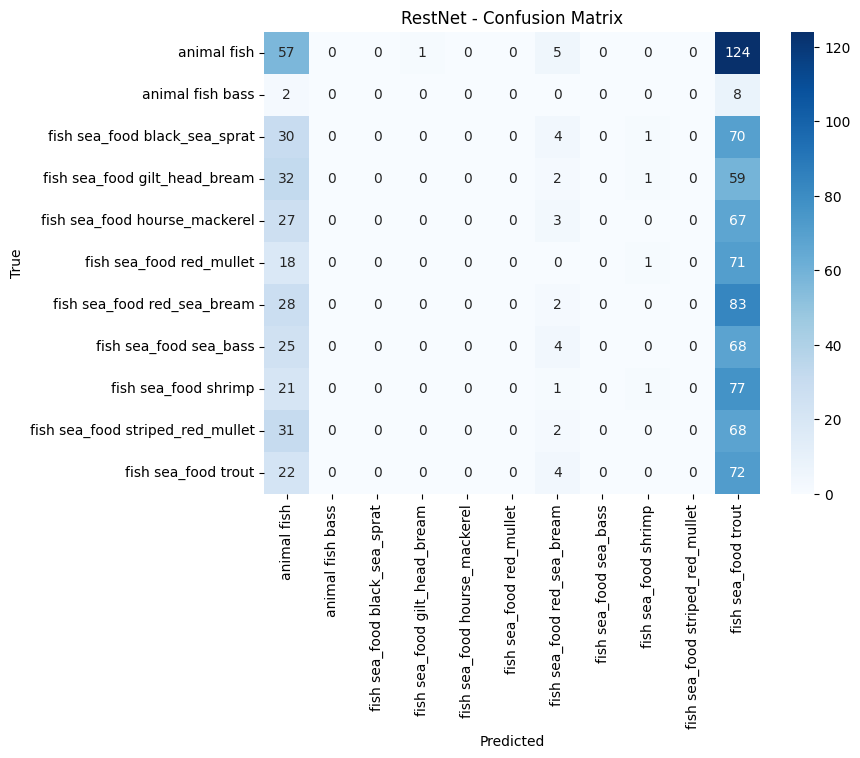

In [53]:
# Confusion Matrix
restnet_cm = confusion_matrix(restnet_y_true, restnet_y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(restnet_cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("RestNet - Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

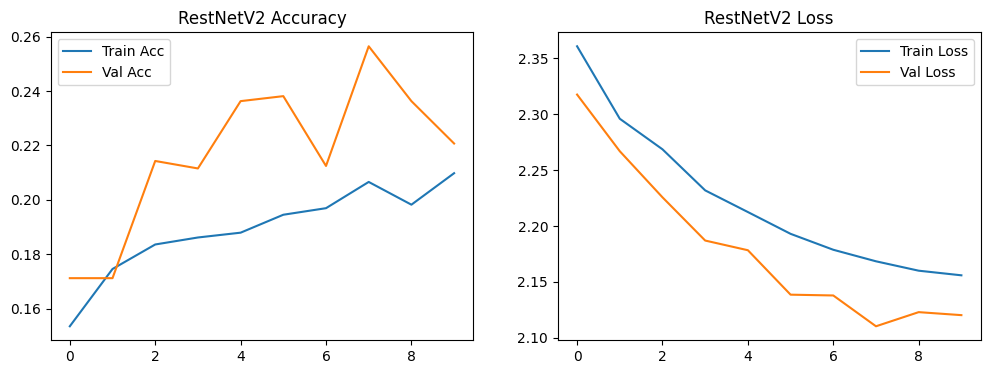

In [54]:
# Training Curve
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(restnet_history.history['accuracy'], label='Train Acc')
plt.plot(restnet_history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("RestNetV2 Accuracy")
plt.subplot(1,2,2)
plt.plot(restnet_history.history['loss'], label='Train Loss')
plt.plot(restnet_history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("RestNetV2 Loss")
plt.show()    
